# Data Bootcamp Final Project

### Kavya Beheraj | May 13, 2016

The goal of my final project for Data Bootcamp was to develop useful data visualizations for my current internship, Student Success Network (SSN). I took two typical datasets currently used by SSN, extracted two variables for both males and females, and created two graphs comparing the network average to an individual organization's outcome. The purpose of such a visualization is to allow SSN's clients, education organizations across New York, to see how well they are doing in their students' social-emotional learning and make decisions on where to distribute resources for targeted programs or interventions.


** Contents:**
1. Background
2. About the Data
    + 2.1 | Links to My Data
    + 2.2 | Dataframes
3. Organizational Data
    + 3.1 | Slicing the Organizational Data
    + 3.2 | Joining the Organizational Data
4. Network Summary Data
5. Creating the Final Output
6. Visualizing the Data
    + 6.1 | Visualizing the Percent Positive, Organization vs. Network
    + 6.2 | Visualizing the Mean, Organization vs. Network

In [217]:
import sys                             
import pandas as pd                   
import matplotlib.pyplot as plt    
import datetime as dt                
import seaborn as sns
import numpy as np          

%matplotlib inline                     

print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version: 3.5.1 |Anaconda 2.4.1 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version:  0.17.1
Today:  2016-05-13


## 1 | Background

Student Success Network (SSN) is a nonprofit that helps 40 partner organizations measure [seven indicators of social-emotional learning (SEL)](http://www.ssn-nyc.org/#!sel-competencies/c123q) in students using a survey:
+ Academic Behaviors
+ Academic Self-Efficacy
+ Growth Mindset
+ Interpersonal Skills
+ Problem-Solving
+ Self-Advocacy
+ Belonging

Social-emotional learning has a huge impact on student outcomes later in life, often comparable to academic outcomes like test scores. SSN has developed a survey to measure social-emotional learning, which they distribute to their partner organizations.

SSN sends the survey responses to another company (the Research Alliance for NYC Schools) for the descriptive statistics, and what they receive is a large, unwieldy spreadsheet that they must translate into easy-to-understand and actionable visualizations. They also provide partner organizations with visualizations of specific subgroups like gender, race, and school, and compare the organization's results on SEL indicators to a network-wide average.

With this project, I attempted to create a uniform method of taking those spreadsheets and turning them into helpful data visualizations.

Source: [SSN Website](http://www.ssn-nyc.org/#!sel-competencies/c123q)

## 2 | About the Data

I received my data directly from Student Success Network, and as such, it is not online. They gave me two spreadsheets in .csv format: a sample organizational output (real data from a de-identified partner organization) and a network wide average.

The most important outcomes to partner organizations are: 
+ **Percent positive:** the percentage of students whose responses are positive for that SEL indicator
+ **Mean:** the average result on a scale of 1 to 5 for that SEL indicator

These two variables provide are the most helpful for organizations to make decisions on resource allocation for student social-emotional learning.

I decided to focus on the **gender subgroup** for the purposes of this project, to reduce the number of different variables at play. Since all of the descriptive statistics they receive for each partner organization are within the same format, I believe SSN can easily translate this program to different subgroups.


### 2.1 | **Links to my data:**
+ [Organizational Data - Males/Females](https://drive.google.com/open?id=0B_6ITYPFY6nTaENEYk5QTWVPelE)
+ [Network Summary Data - Males/Females](https://drive.google.com/open?id=0B_6ITYPFY6nTTGtqZ3ZoTi01Xzg)


### 2.2 | Dataframes

These are the dataframes I created in order to extract percent positive and mean data for males and females at the organization and network-wide level. The final output is a dataframe summarizing the mean and percent positive for all variables at both levels.

#### Organization Data

| **Label**     | **Dataframe**                                 |
|:---------------------------------------------------------------|
| MaleFemale    | Total Organization Data for Males and Females |
| mean          | Mean for Males and Females                    |
| ppos          | Percent Positive for Males and Females        |
| male          | Male Data (Mean and Percent Positive)         |
| female        | Female Data (Mean and Percent Positive)       |
| mlmean        | Mean Data for Males                           |
| mlppos        | Percent Positive Data for Males               |
| fmmean        | Mean Data for Females                         |
| fmppos        | Percent Positive Data for Females             |


#### Network Data

| **Label**     | **Dataframe**                                      |
|:--------------------------------------------------------------------|
| network       | Total Network Data                                 |
| mlnet         | Male Network Data (Mean and Percent Positive)      |
| fmnet         | Female Network Data (Mean and Percent Positive)    |
| output        | Network and Organizational Data, Males and Females |


#### Total Data: Dataframes for both the organization and the network
 
| **Label**     | **Dataframe**                                                         |
|:--------------------------------------------------------------------------------------|
| output        | Network and Organizational Data, Males and Females                    |
| mean_output   | Mean Data for Network and Organization, Males and Females             |
| pp_output     | Percent Positive Data for Network and Organization, Males and Females |
| pp_net        | Mean Data for Network, Males and Females                              |
| mean_net      | Percent Positive Data for Network, Males and Females                  |

## 3 | Organizational Data

I first focused on cleaning up the Sample Organizational Output for Males and Females. I wanted to extract the two outcomes (percent positive and mean) for both males and females along the seven SEL indicators.

The results include data from 230 males and 334 females, or 564 students in total.

In [47]:
MaleFemale = "/Users/kavyabeheraj/Desktop/Current Classes/Data Bootcamp/Male_Female_Sample_Org_Output.csv"

# Sample organizational output for males and females

df = pd.read_csv(MaleFemale)
df

### 3.1 | Slicing the Organizational Data

I noticed that the male outcomes consisted of the first 14 rows of the spreadsheet, while the female outcomes consisted of the last 14. The 14 rows of outcomes were each divided into 7 rows for the mean and 7 rows for the percent positive (called percent perfect in the dataframe).

I sliced the spreadsheet into **four separate dataframes:**
+ Male Mean (mlmean)
+ Male Percent Positive (mlpp)
+ Female Mean (fmmean)
+ Female Percent Positive (fmpp)

I also set the SEL indicators as the index renamed all of them for consistency.

In [56]:
male = pd.read_csv(MaleFemale).head(14)
female = pd.read_csv(MaleFemale).tail(14)

In [4]:
mlmean = male.head(7)                 # Reads the first seven lines of the dataframe
mlmean = mlmean[["Label","Mean"]].set_index("Label")     # Slices only two columns and sets the index to be "Label"
mlmean = mlmean.rename(index={"Academic Behavior" : "AcaBeh", 
                              "Academic Self-efficacy" : "AcaEf", 
                              "Growth Mindset" : "Growth", 
                              "Interpersonal Skills" : "Intp", 
                              "Problem Solving" : "Prob", 
                              "SELF-ADVOCACY" : "SelfAd", 
                              "BELONGING" : "Belong"},
                      columns={"Mean" : "Male Mean"})
mlmean

,Male Mean
Label,
AcaBeh,3.414368
AcaEf,2.770742
Growth,2.864493
Intp,4.733817
Prob,2.711232
SelfAd,2.791545
Belong,3.897101


In [5]:
mlpp = male.tail(7)                 # Reads the first seven lines of the dataframe
mlpp = mlpp[["Label","Mean"]].set_index("Label")     # Slices only two columns and sets the index to be "Label"
mlpp = mlpp.rename(index={"Academic Behavior Percent Perfect" : "AcaBeh", 
                          "Academic Self-efficacy Percent Perfect" : "AcaEf", 
                          "Growth Mindset Percent Perfect" : "Growth", 
                          "Interpersonal Skills Percent Perfect" : "Intp", 
                          "Problem Solving Percent Perfect" : "Prob", 
                          "SELF ADVOCACY PERCENT PERFECT" : "SelfAd", 
                          "BELONGING PERCENT PERFECT ge 4" : "Belong"},
                   columns={"Mean" : "Male Percent Positive"})

mlpp

,Male Percent Positive
Label,
AcaBeh,0.262009
AcaEf,0.432314
Growth,0.510917
Intp,0.456522
Prob,0.330435
SelfAd,0.333333
Belong,0.591304


In [57]:
fmmean = female.head(7)                 # Reads the first seven lines of the dataframe
fmmean = fmmean[["Label","Mean"]].set_index("Label")     # Slices only two columns and sets the index to be "Label"
fmmean = fmmean.rename(index={"Academic Behavior" : "AcaBeh", 
                              "Academic Self-efficacy" : "AcaEf", 
                              "Growth Mindset" : "Growth", 
                              "Interpersonal Skills" : "Intp", 
                              "Problem Solving" : "Prob", 
                              "SELF-ADVOCACY" : "SelfAd", 
                              "BELONGING" : "Belong"},
                      columns={"Mean" : "Female Mean"})
fmmean

,Female Mean
Label,
AcaBeh,3.519144
AcaEf,2.640891
Growth,2.825781
Intp,4.817563
Prob,2.672490
SelfAd,2.834629
Belong,3.927492


In [58]:
fmpp = female.tail(7)
fmpp = fmpp[["Label","Mean"]].set_index("Label")
fmpp = fmpp.rename(index={"Academic Behavior Percent Perfect" : "AcaBeh", 
                          "Academic Self-efficacy Percent Perfect" : "AcaEf", 
                          "Growth Mindset Percent Perfect" : "Growth", 
                          "Interpersonal Skills Percent Perfect" : "Intp", 
                          "Problem Solving Percent Perfect" : "Prob", 
                          "SELF ADVOCACY PERCENT PERFECT" : "SelfAd", 
                          "BELONGING PERCENT PERFECT ge 4" : "Belong"},
                   columns={"Mean" : "Female Percent Positive"}) 
fmpp

,Female Percent Positive
Label,
AcaBeh,0.293210
AcaEf,0.323263
Growth,0.506061
Intp,0.496988
Prob,0.322289
SelfAd,0.389058
Belong,0.567976


### 3.2 | Joining the Organizational Data

After creating four separate dataframes, I decided to concatenate them along the seven SEL indicators. I envisioned a problem in graphing both outcomes (mean and percent positive) within the same graph, since they had different scales, but seeing all of the data within one dataframe is easier to understand.

I created two dataframes summarizing the mean and percent positive (ppos), as well as one with both outcomes (meanppos).

In [212]:
mean = pd.concat([mlmean, fmmean], axis=1)
mean

,Male Mean,Female Mean
Label,,
AcaBeh,3.414368,3.519144
AcaEf,2.770742,2.640891
Growth,2.864493,2.825781
Intp,4.733817,4.817563
Prob,2.711232,2.672490
SelfAd,2.791545,2.834629
Belong,3.897101,3.927492


In [42]:
ppos = pd.concat([mlpp, fmpp], axis=1)
ppos

,Male Percent Positive,Female Percent Positive
Label,,
AcaBeh,0.262009,0.293210
AcaEf,0.432314,0.323263
Growth,0.510917,0.506061
Intp,0.456522,0.496988
Prob,0.330435,0.322289
SelfAd,0.333333,0.389058
Belong,0.591304,0.567976


In [43]:
meanppos = pd.concat([mlpp, fmpp, mlmean, fmmean], axis=1)
meanppos

,Male Percent Positive,Female Percent Positive,Male Mean,Female Mean
Label,,,,
AcaBeh,0.262009,0.293210,3.414368,3.414368
AcaEf,0.432314,0.323263,2.770742,2.770742
Growth,0.510917,0.506061,2.864493,2.864493
Intp,0.456522,0.496988,4.733817,4.733817
Prob,0.330435,0.322289,2.711232,2.711232
SelfAd,0.333333,0.389058,2.791545,2.791545
Belong,0.591304,0.567976,3.897101,3.897101


In [ ]:
mean.plot.barh(figsize = (10,7))

## 4 | Network Summary Data
I read in the male and female summary data for the entire network. I then extracted the data for males and females, avoiding the rows which had a blank for "isFemale". Unlike the organizational data, SSN network data has a separate column for percent positive, which meant that I did not have to create as many dataframes to get the same output.

I created two dataframes, one summarizing male network data (mlnet) and one for female network data (fmnet).

In [80]:
df2 = "/Users/kavyabeheraj/Desktop/Current Classes/Data Bootcamp/Network_Summary_Gender.csv"

network = pd.read_csv(df2)
network

In [61]:
mlnet = network.tail(7)                 
mlnet = mlnet[["label","mean", "percentPositive"]].set_index("label")     
mlnet = mlnet.rename(index={"Academic Behavior" : "AcaBeh", 
                          "Academic Self-efficacy" : "AcaEf", 
                          "Growth Mindset" : "Growth", 
                          "Interpersonal Skills" : "Intp", 
                          "Problem Solving" : "Prob", 
                          "Self-Advocacy" : "SelfAd", 
                          "Belonging" : "Belong"},
                   columns={"mean" : "Male Mean, Network",
                           "percentPositive" : "Male Percent Positive, Network"})
mlnet

,"Male Mean, Network","Male Percent Positive, Network"
label,,
AcaBeh,3.545661,0.285714
AcaEf,2.600877,0.263158
Belong,3.392157,0.055556
Growth,2.411111,0.200000
Intp,4.387238,0.294118
Prob,2.645614,0.190476
SelfAd,2.786946,0.222222


In [64]:
fmnet = network[7:14]              
fmnet = fmnet[["label","mean", "percentPositive"]].set_index("label")     
fmnet = fmnet.rename(index={"Academic Behavior" : "AcaBeh", 
                          "Academic Self-efficacy" : "AcaEf", 
                          "Growth Mindset" : "Growth", 
                          "Interpersonal Skills" : "Intp", 
                          "Problem Solving" : "Prob", 
                          "Self-Advocacy" : "SelfAd", 
                          "Belonging" : "Belong"},
                   columns={"mean" : "Female Mean, Network", "percentPositive" : "Female Percent Positive, Network"})
fmnet

,"Female Mean, Network","Female Percent Positive, Network"
label,,
AcaBeh,3.508376,0.221106
AcaEf,2.660160,0.228070
Belong,3.548576,0.187970
Growth,2.442761,0.188917
Intp,4.670432,0.384422
Prob,2.695707,0.203008
SelfAd,2.789838,0.195980


## 5 | Slicing the Final Output
After I cleaned and sliced both the organization and network-wide data, I joined them along the SEL indicators and created separate dataframes for mean and percent positive.

In [66]:
output = pd.concat([meanppos, fmnet, mlnet ], axis=1)
output

,Male Percent Positive,Female Percent Positive,Male Mean,Female Mean,"Female Mean, Network","Female Percent Positive, Network","Male Mean, Network","Male Percent Positive, Network"
AcaBeh,0.262009,0.293210,3.414368,3.414368,3.508376,0.221106,3.545661,0.285714
AcaEf,0.432314,0.323263,2.770742,2.770742,2.660160,0.228070,2.600877,0.263158
Belong,0.591304,0.567976,3.897101,3.897101,3.548576,0.187970,3.392157,0.055556
Growth,0.510917,0.506061,2.864493,2.864493,2.442761,0.188917,2.411111,0.200000
Intp,0.456522,0.496988,4.733817,4.733817,4.670432,0.384422,4.387238,0.294118
Prob,0.330435,0.322289,2.711232,2.711232,2.695707,0.203008,2.645614,0.190476
SelfAd,0.333333,0.389058,2.791545,2.791545,2.789838,0.195980,2.786946,0.222222


In [74]:
mean_output = output[["Male Mean", 
                      "Female Mean", 
                      "Male Mean, Network", 
                      "Female Mean, Network"]]
mean_output

,Male Mean,Female Mean,"Male Mean, Network","Female Mean, Network"
AcaBeh,3.414368,3.414368,3.545661,3.508376
AcaEf,2.770742,2.770742,2.600877,2.660160
Belong,3.897101,3.897101,3.392157,3.548576
Growth,2.864493,2.864493,2.411111,2.442761
Intp,4.733817,4.733817,4.387238,4.670432
Prob,2.711232,2.711232,2.645614,2.695707
SelfAd,2.791545,2.791545,2.786946,2.789838


In [88]:
pp_output = output[["Male Percent Positive",  
                    "Male Percent Positive, Network",
                    "Female Percent Positive",
                    "Female Percent Positive, Network"]]
pp_output

,Male Percent Positive,"Male Percent Positive, Network",Female Percent Positive,"Female Percent Positive, Network"
AcaBeh,0.262009,0.285714,0.293210,0.221106
AcaEf,0.432314,0.263158,0.323263,0.228070
Belong,0.591304,0.055556,0.567976,0.187970
Growth,0.510917,0.200000,0.506061,0.188917
Intp,0.456522,0.294118,0.496988,0.384422
Prob,0.330435,0.190476,0.322289,0.203008
SelfAd,0.333333,0.222222,0.389058,0.195980


In [152]:
mean_net = output[["Male Mean, Network",
                   "Female Mean, Network"]]
mean_net

,"Male Mean, Network","Female Mean, Network"
AcaBeh,3.545661,3.508376
AcaEf,2.600877,2.660160
Belong,3.392157,3.548576
Growth,2.411111,2.442761
Intp,4.387238,4.670432
Prob,2.645614,2.695707
SelfAd,2.786946,2.789838


In [169]:
ppos_net = output[["Male Percent Positive, Network",
                   "Female Percent Positive, Network"]]
ppos_net

,"Male Percent Positive, Network","Female Percent Positive, Network"
AcaBeh,0.285714,0.221106
AcaEf,0.263158,0.228070
Belong,0.055556,0.187970
Growth,0.200000,0.188917
Intp,0.294118,0.384422
Prob,0.190476,0.203008
SelfAd,0.222222,0.195980


## 6 | Visualizing the Data

I created two visualizations of the data, one for percent positive and another for the mean. I compared male vs. female and the organization's data vs. the network-wide outcome.

### 6.1 | Visualizing the Percent Positive, Organization vs. Network

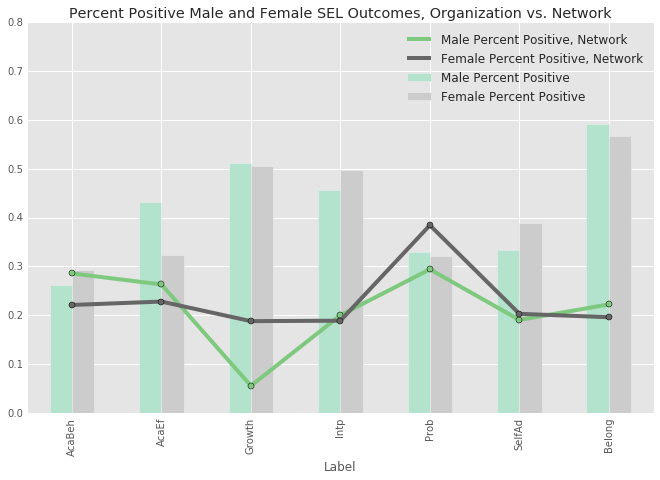

In [354]:
plt.style.use('seaborn-pastel')

ax = ppos_net.plot(linestyle='-', marker='o', colormap = "Accent")
ppos.plot(kind='bar', colormap = "Pastel2",
          ax=ax,
         figsize = (10,7))

ax.set_ylim(0, 0.8)
ax.set_title("Percent Positive Male and Female SEL Outcomes, Organization vs. Network")

From the data above, we can see that this organization has a greater percentage of students who meet or exceed requirements for the 7 SEL indicators, except for Problem-Solving.

### 5.1 | Visualizing the Mean, Organization vs. Network

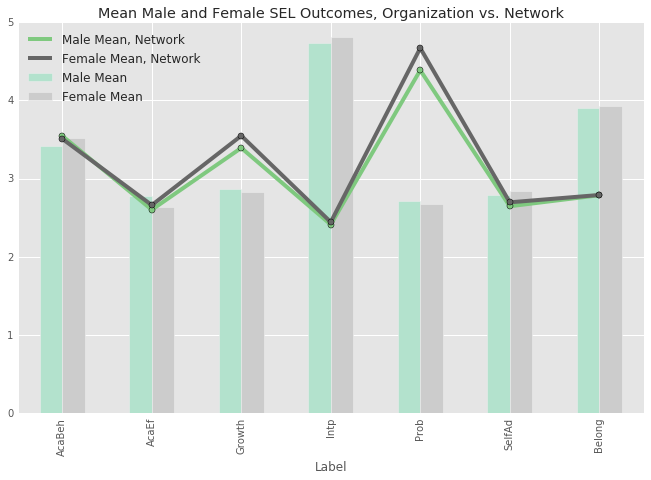

In [353]:
plt.style.use('seaborn-pastel')

ax = mean_net.plot(linestyle='-', marker='o', colormap = "Accent")
mean.plot(kind='bar', colormap = "Pastel2",
          ax=ax,
         figsize = (10,7))

ax.set_ylim(0, 5)
ax.set_title("Mean Male and Female SEL Outcomes, Organization vs. Network")

Looking at the mean for the organization compared to the network, we see that the students at this organization generally perform below-average on SEL indicators, except for Interpersonal Skills. If I was advising this organization, I would suggest that they distribute more resources towards enhancing their students' problem-solving skills, as well as their academic behaviors in general.